In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

In [2]:
PCOS_inf = pd.read_csv('./../PCOS_infertility.csv')
PCOS_woinf = pd.read_excel('./../PCOS_data_without_infertility.xlsx', sheet_name="Full_new")

data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')

data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', 
                 '  I   beta-HCG(mIU/mL)_y', 'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

data.columns = [col.strip() for col in data.columns]

X=data.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis = 1)
y=data["PCOS (Y/N)"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
random_forest = RandomForestClassifier()
pipe = Pipeline(steps=(['ss', ss], ['random_forest', random_forest]))

In [5]:
pipe

Pipeline(memory=None,
         steps=(['ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)],
                ['random_forest',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False)]),
         verbose=False)

In [6]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ['random_forest',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False)]],
         verbose=False)

In [7]:
acc_rf_clf_train = round(pipe.score(X_train, y_train)*100,2) 
acc_rf_clf_test = round(pipe.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_clf_train))
print("Testing Accuracy: % {}".format(acc_rf_clf_test))

Training Accuracy: % 100.0
Testing Accuracy: % 85.32


In [8]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [9]:
data.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

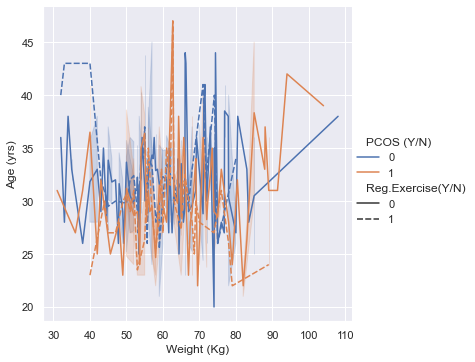

In [10]:
sns.set(style="darkgrid")

sns.relplot(x="Weight (Kg)", y="Age (yrs)",
            hue="PCOS (Y/N)", style="Reg.Exercise(Y/N)",
            kind="line", data=data);

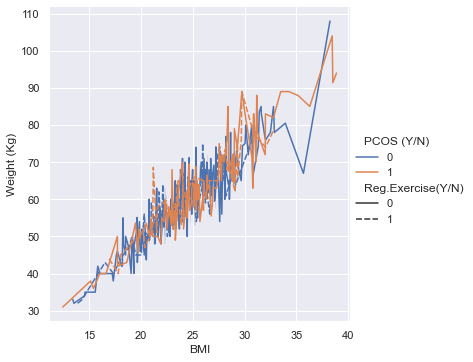

In [11]:
sns.relplot(x="BMI", y="Weight (Kg)",
            hue="PCOS (Y/N)", style="Reg.Exercise(Y/N)",
            kind="line", data=data);

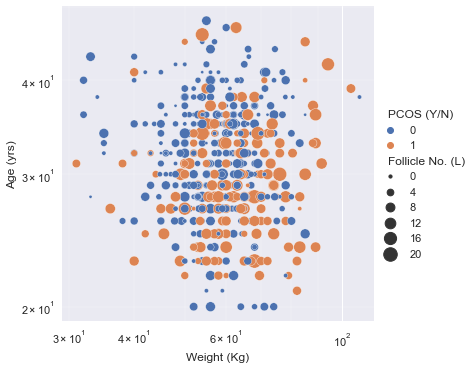

In [12]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="Weight (Kg)", y="Age (yrs)",
    hue="PCOS (Y/N)", size="Follicle No. (L)",
    sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

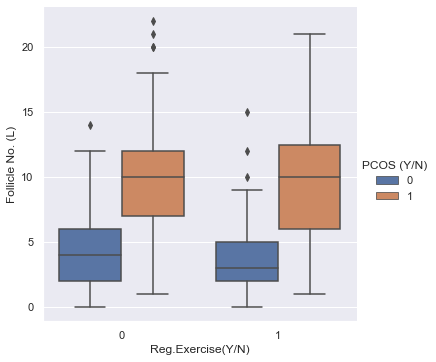

In [13]:
sns.catplot(x="Reg.Exercise(Y/N)", y="Follicle No. (L)", hue="PCOS (Y/N)", kind="box", data=data)

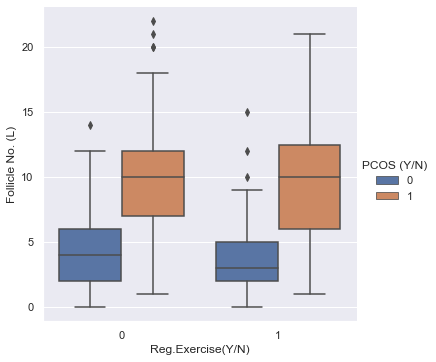

In [14]:
sns.catplot(x="Reg.Exercise(Y/N)", y="Follicle No. (L)", hue="PCOS (Y/N)", kind="box", data=data)

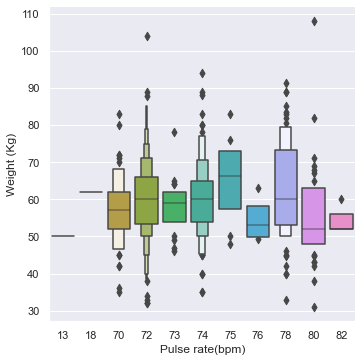

In [15]:
sns.catplot(x="Pulse rate(bpm)", y="Weight (Kg)", kind="boxen",
            data=data.sort_values("Pulse rate(bpm)"))

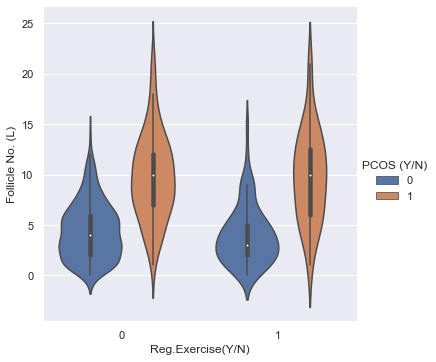

In [16]:
sns.catplot(x="Reg.Exercise(Y/N)", y="Follicle No. (L)", hue="PCOS (Y/N)",
            kind="violin", data=data)

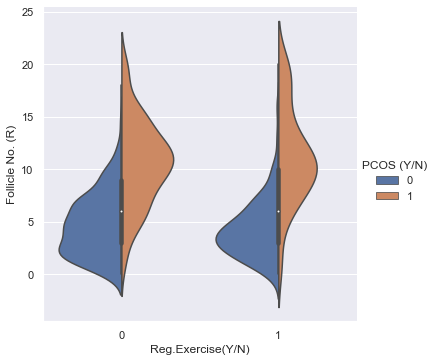

In [17]:
sns.catplot(x="Reg.Exercise(Y/N)", y="Follicle No. (R)", hue="PCOS (Y/N)",
            kind="violin", split=True, data=data)

<AxesSubplot:xlabel='BP _Diastolic (mmHg)', ylabel='Weight (Kg)'>

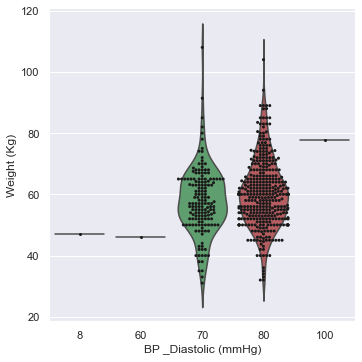

In [18]:
g = sns.catplot(x="BP _Diastolic (mmHg)", y="Weight (Kg)", kind="violin", inner=None, data=data)
sns.swarmplot(x="BP _Diastolic (mmHg)", y="Weight (Kg)", color="k", size=3, data=data, ax=g.ax)

<AxesSubplot:xlabel='PCOS (Y/N)', ylabel='Height(Cm)'>

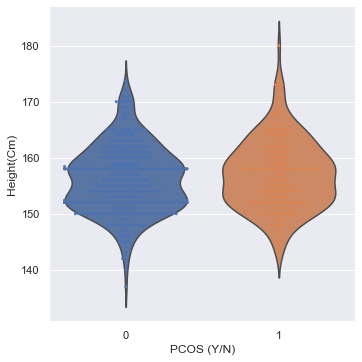

In [19]:
g = sns.catplot(x="PCOS (Y/N)", y="Height(Cm)", kind="violin", inner=None, data=data)
sns.swarmplot(x="PCOS (Y/N)", y="Height(Cm)", size=3, data=data, ax=g.ax)

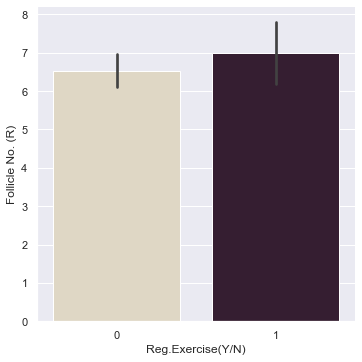

In [20]:
sns.catplot(x = "Reg.Exercise(Y/N)", y="Follicle No. (R)", palette="ch:.30", kind = 'bar', data=data)

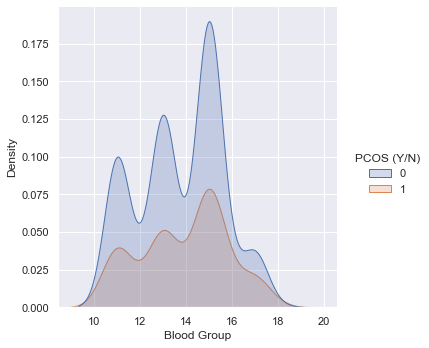

In [21]:
sns.displot(data, x="Blood Group", hue="PCOS (Y/N)", kind="kde", fill=True)

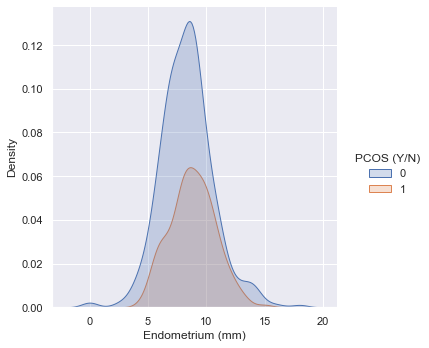

In [22]:
sns.displot(data, x="Endometrium (mm)", hue="PCOS (Y/N)", kind="kde", fill=True)

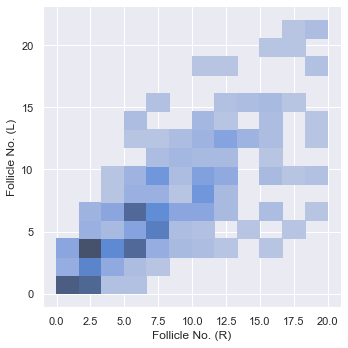

In [23]:
sns.displot(data, x="Follicle No. (R)", y="Follicle No. (L)")

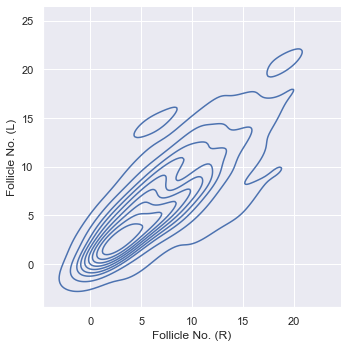

In [24]:
sns.displot(data, x="Follicle No. (R)", y="Follicle No. (L)", kind="kde")

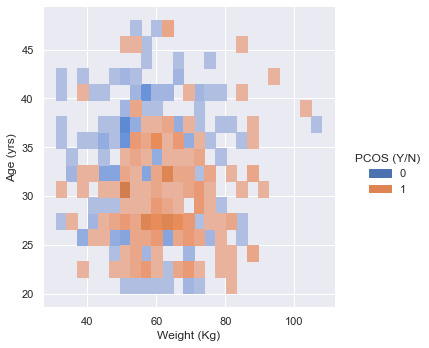

In [25]:
sns.displot(data, x="Weight (Kg)", y="Age (yrs)", hue="PCOS (Y/N)")

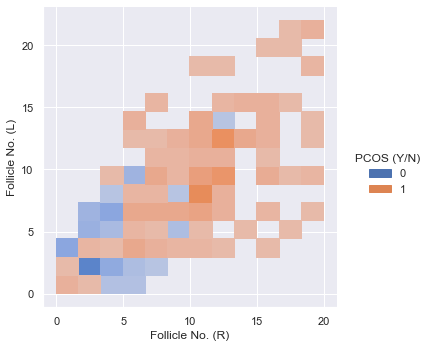

In [26]:
sns.displot(data, x="Follicle No. (R)", y="Follicle No. (L)", hue="PCOS (Y/N)")

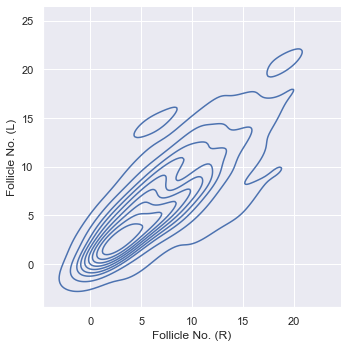

In [27]:
sns.displot(data, x="Follicle No. (R)", y="Follicle No. (L)", kind="kde")

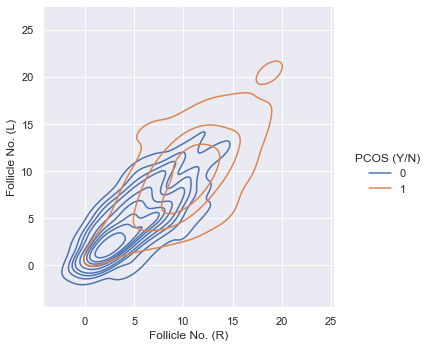

In [28]:
sns.displot(data, x="Follicle No. (R)", y="Follicle No. (L)", hue="PCOS (Y/N)", kind="kde")

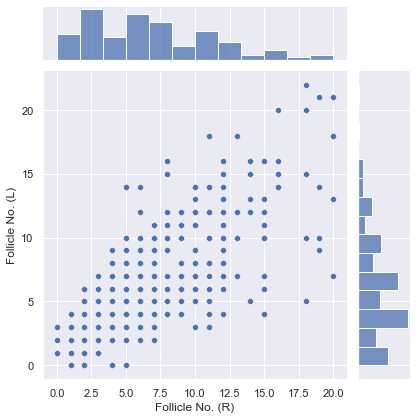

In [29]:
sns.jointplot(data=data, x="Follicle No. (R)", y="Follicle No. (L)")

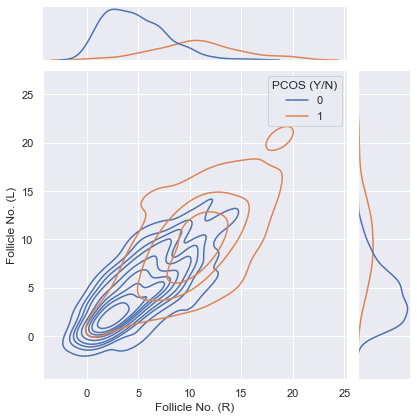

In [30]:
sns.jointplot(
    data=data,
    x="Follicle No. (R)", y="Follicle No. (L)", hue="PCOS (Y/N)",
    kind="kde"
)

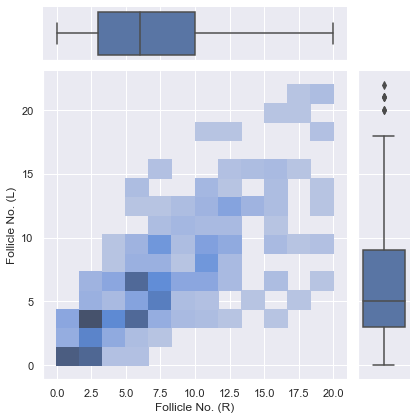

In [31]:
g = sns.JointGrid(data=data, x="Follicle No. (R)", y="Follicle No. (L)")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

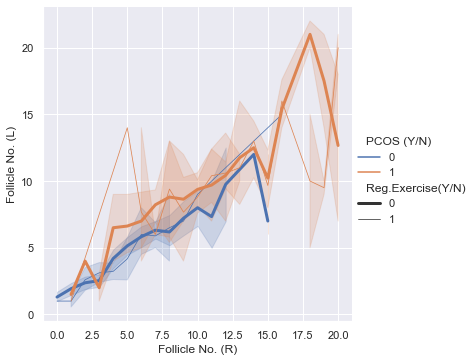

In [32]:
sns.relplot(x="Follicle No. (R)", y="Follicle No. (L)", hue="PCOS (Y/N)", size="Reg.Exercise(Y/N)",
           kind="line", data=data);

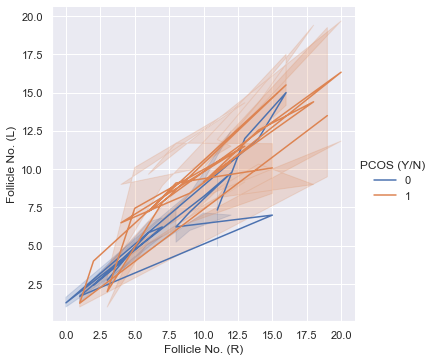

In [33]:
sns.relplot(x="Follicle No. (R)", y="Follicle No. (L)", sort=False, kind="line", hue="PCOS (Y/N)", data=data);

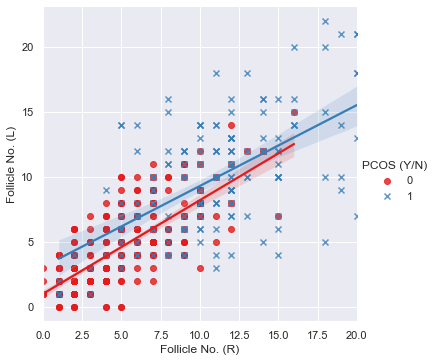

In [34]:
sns.lmplot(x="Follicle No. (R)", y="Follicle No. (L)", hue="PCOS (Y/N)", data=data,
           markers=["o", "x"], palette="Set1");

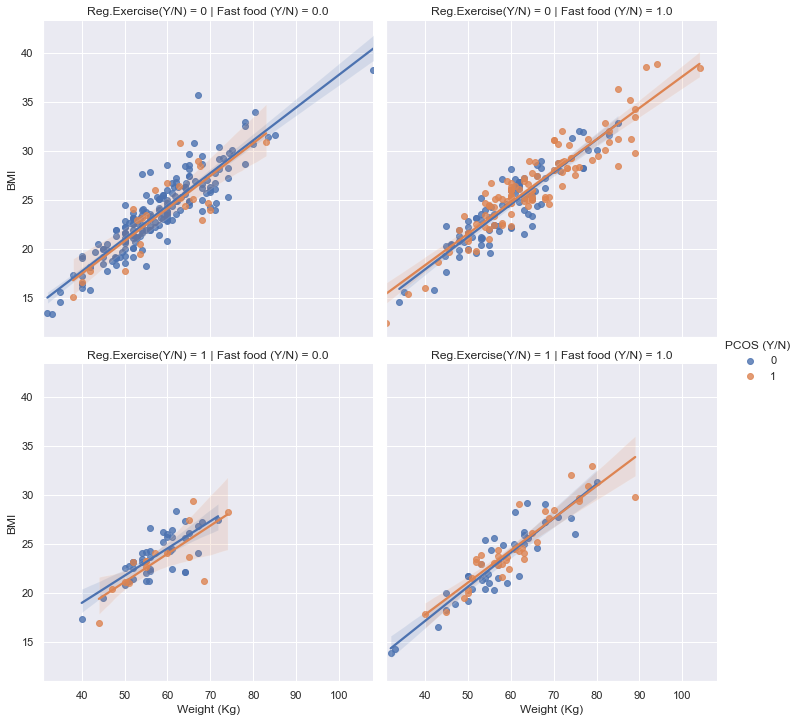

In [35]:
sns.lmplot(x="Weight (Kg)", y="BMI", hue="PCOS (Y/N)",
           col="Fast food (Y/N)", row="Reg.Exercise(Y/N)", data=data);